In [36]:
from bs4 import BeautifulSoup
import pandas as pd
def aspx_to_csv(aspx_file,output_name):
  with open('Telechargement-Histo-Valeur.aspx', 'r') as file:
    aspx_contents = file.read()
  soup = BeautifulSoup(aspx_contents, 'html.parser')
  # Find the table with the specified id
  table = soup.find('table', {'id': 'GridHistValeur'})
  dict={}
  headers=table.find('tr')
  colnames=[col.text.strip() for col in headers.find_all('td')]
  for header in colnames:
    dict[header]=[]
  # Find all rows in the table
  rows = table.find_all('tr')
  # Iterate through each row
  for row in rows:
    # Find all cells in the row
    cells = row.find_all('span')
    cell=[cell.text.strip() for cell in cells]
    L=[i.replace(",",".") for i in cell]
    s=",".join(L)
    for i in range(len(L)):
        dict[colnames[i]].append(L[i])
    pd.DataFrame(dict).to_csv(output_name,index=False)

In [37]:
aspx_to_csv("Telechargement-Histo-Valeur.aspx","datanew.csv")
df=pd.read_csv('datanew.csv')

In [53]:
df.head()

,Séance,COURS_CLOTURE,COURS_AJUSTE,EVOLUTION,QUANTITE_ECHANGE,VOLUME
0,01/12/2022,410.00,410.00,1.74,16537,6781578.30
1,30/11/2022,403.00,403.00,-1.47,62881,25385455.15
2,29/11/2022,409.00,409.00,-0.24,19363,7927594.65
3,28/11/2022,410.00,410.00,0.01,26033,10676550.00
4,25/11/2022,409.95,409.95,1.72,6136,2509855.00


In [61]:
df[::-1].shape[0]

732

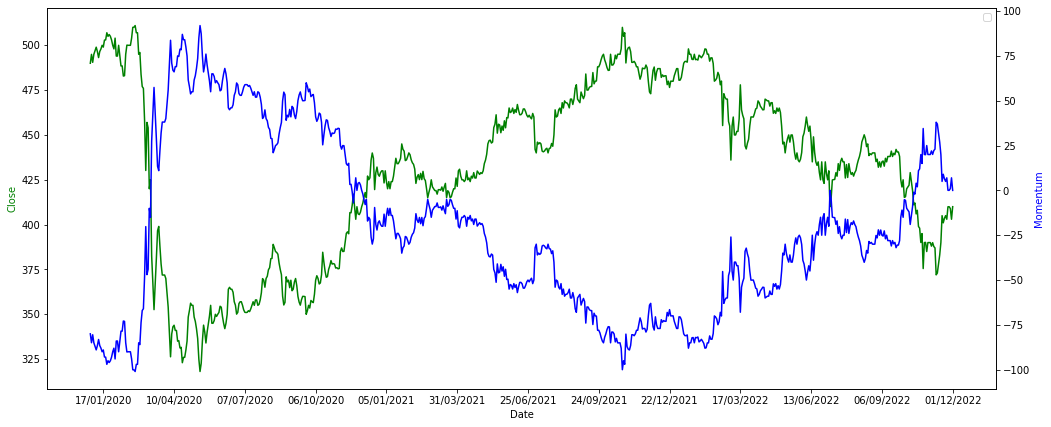

511.0
318.1
3312760487.35
[7.0, 1.0, 0.0, -25.0]


In [81]:
import matplotlib.pyplot as plt
import numpy as np
class Stock:
    def __init__(self, name, csv_file):
        self.name = name
        self.data = pd.read_csv(csv_file).iloc[::-1]
    def plot(self):
        plt.rcParams['figure.figsize'] = [17, 7]
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(self.data['Séance'], self.data['COURS_CLOTURE'], 'g-')
        ax2.plot(self.data['Séance'], self.data['VOLUME'], 'b-')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Close', color='g')
        ax2.set_ylabel('Volume', color='b')
        l = self.data.shape[0]
        plt.xticks(self.data.index[::60])
        plt.legend()
        #plt.show()
    def max_value(self):
        return self.data['COURS_CLOTURE'].max()
    def min_value(self):
        return self.data['COURS_CLOTURE'].min()
    def max_volume(self):
        return self.data['VOLUME'].max()
    def max_quantite(self):
        return self.data['QUANTITE_ECHANGE'].max()
    def momentum(self,N):
      M=[self.data.iloc[-1]["COURS_CLOTURE"] - self.data.iloc[-(n+1)]["COURS_CLOTURE"] for n in N]
      return M
    def calculate_sma_for_n(self, n_values):
        for n in n_values:
            self.data["SMA_" + str(n)] = self.data["COURS_CLOTURE"].rolling(window=n).mean()
            print("SMA for N =", n)
            print(self.data["SMA_" + str(n)])
    def visualize(self): 
      l=self.data.shape[0]
      M=self.momentum(range(l-1,-1,-1))
      plt.rcParams['figure.figsize'] = [17, 7]
      fig, ax1 = plt.subplots()
      ax2 = ax1.twinx()
      ax1.plot(self.data['Séance'], self.data['COURS_CLOTURE'], 'g-')
      ax2.plot(self.data['Séance'], M, 'b-')
      ax1.set_xlabel('Date')
      ax1.set_ylabel('Close', color='g')
      ax2.set_ylabel('Momentum', color='b')
      l = self.data.shape[0]
      plt.xticks(self.data.index[::60])
      plt.legend()
      plt.show()
#objet stock
attijary = Stock('attijary', 'datanew.csv')
attijary.visualize()
#attijary.plot()
print(attijary.max_value())
print(attijary.min_value())
print(attijary.max_volume())
print(attijary.momentum([1,2,3,60]))

        


In [40]:
%load_ext cython

In [43]:
%%cython -a
cpdef momentum_cython(data,N):
  cdef float M[]

In [42]:
pip install Numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import numpy as np
import numba
from numba import jit
@jit(nopython=True)
def momentum_numba(self,N):
  l=len(N)
  M=np.zeros(len(N))
  for i in np.arange(l):
    M[i]=[self.data.iloc[-1]["COURS_CLOTURE"] - self.data.iloc[-(n+1)]["COURS_CLOTURE"] for n in N]

In [48]:
Stock.momentum_numba = momentum_numba

In [51]:
attijary = Stock('attijary', 'datanew.csv')
attijary.momentum([1,2,3,5,88])
attijary.momentum_numba([1,2,3,5,88])

TypingError: ignored